# Gradient Descent
Gradient descent là một thuật toán tối ưu hóa thường được sử dụng để đào tạo các mô hình học máy và mạng nơ-ron. Nó đào tạo các mô hình học máy bằng cách giảm thiểu lỗi giữa kết quả dự đoán và kết quả thực tế.
Thuật toán hoạt động bằng cách điều chỉnh liên tục các tham số của mô hình (như trọng số và độ lệch) theo hướng làm giảm chi phí nhiều nhất. Hướng này được xác định bằng cách tính toán độ dốc (hướng đến mức tăng chi phí nhiều nhất) của hàm chi phí liên quan đến các tham số, sau đó di chuyển các tham số theo hướng ngược lại.


## One-Dimensional Gradient Descent
Gradient descent trong một chiều là một ví dụ tuyệt vời để giải thích tại sao thuật toán gradient descent có thể giảm giá trị của hàm mục tiêu. Xét một hàm thực khả vi liên tục $f: \mathbb{R} \rightarrow \mathbb{R}$ . Sử dụng khai triển Taylor, ta được:
$$f(x+\epsilon)=f(x)+\epsilon f^{\prime}(x)+O\left(\epsilon^2\right). \tag{1}$$ 
Tức là, trong xấp xỉ bậc một, $f(x+\epsilon)$ được xác định bởi giá trị hàm $f(x)$ và đạo hàm bậc một $f^{\prime}(x)$ tại $x$. Không vô lý khi giả định rằng với $\epsilon$ nhỏ, việc di chuyển theo hướng gradient âm sẽ giảm $f$. Để đơn giản, ta chọn một kích thước bước cố định $\eta>0$ và chọn $\epsilon=-\eta f^{\prime}(x)$. Thay vào khai triển Taylor ở trên, ta được:
$$f\left(x-\eta f^{\prime}(x)\right)=f(x)-\eta f^{\prime 2}(x)+O\left(\eta^2 f^{\prime 2}(x)\right).\tag{2}$$
Nếu đạo hàm $f^{\prime}(x) \neq 0$ không biến mất, ta đạt được tiến bộ vì $\eta f^{\prime 2}(x)>0$. Hơn nữa, ta luôn có thể chọn $\eta$ đủ nhỏ để các hạng bậc cao trở nên không đáng kể. Do đó, ta có:
$$f\left(x-\eta f^{\prime}(x)\right) \leq f(x). \tag{3}$$
Điều này có nghĩa là, nếu ta sử dụng:
$$x \leftarrow x-\eta f^{\prime}(x). \tag{4}$$
để lặp $x$, giá trị của hàm $f(x)$ có thể giảm. Do đó, trong gradient descent, ta đầu tiên chọn một giá trị ban đầu $x$ và một hằng số $\eta>0$, sau đó sử dụng chúng để lặp $x$ liên tục cho đến khi đạt điều kiện dừng, ví dụ, khi độ lớn của gradient $\left|f^{\prime}(x)\right|$ đủ nhỏ hoặc số lần lặp đạt một giá trị nhất định.
### Ví dụ minh họa
Ta chọn hàm mục tiêu $f(x)=x^2 +5sin(x)$ để minh họa cách thực hiện gradient descent. Ta có $f^{\prime}(x) =2x + 5cos(x)$

In [34]:
%matplotlib inline
import numpy as np
import torch
import d2l
def f(x):  # objective function
    return x**2 + 5 * np.sin(x)

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2*x + 5 * np.cos(x)

Tiếp theo, ta sử dụng $x=-5$ làm giá trị ban đầu và giả sử $\eta=0.1$. Sử dụng gradient descent để lặp $x$ 15 lần, ta có thể thấy rằng x xuất phát từ bên trái và cuối cùng, giá trị của $x$ tiến gần đến nghiệm tối ưu.

In [35]:
def gd(eta, f_grad, start_x, step):
    x = start_x
    results = [x]
    for i in range(step):
        x -= eta * f_grad(x)
        results.append(x)
    print(f'epoch 11, x: {x:.6f}')
    return results

results = gd(0.1, f_grad,-5,15)

epoch 11, x: -1.110513


Tiến trình tối ưu hóa $x$ có thể được vẽ như sau.

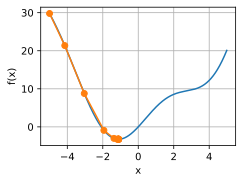

In [36]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = np.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])
show_trace(results, f)

Ta sử dụng $x=4$ làm giá trị ban đầu và giả sử $\eta=0.1$. Sử dụng gradient descent để lặp $x$ 30 lần, ta có thể thấy rằng x xuất phát từ bên phải và đi dần tới nghiệm tối ưu

epoch 11, x: -1.105655


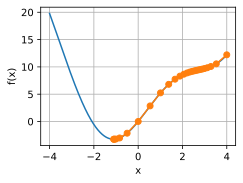

In [37]:
results = gd(0.1, f_grad,4,25)
show_trace(results, f)

### Learning Rate
Tốc độ học (learning rate) 𝜂 có thể được thiết lập bởi người thiết kế thuật toán. Nếu chúng ta sử dụng một tốc độ học quá nhỏ, nó sẽ khiến `𝑥` cập nhật rất chậm, đòi hỏi nhiều vòng lặp hơn để thu được nghiệm tốt hơn. Để minh họa điều xảy ra trong trường hợp như vậy, hãy xem xét tiến trình trong cùng bài toán tối ưu với 𝜂 = 0.02. Như ta có thể thấy, ngay cả sau 10 bước lặp, chúng ta vẫn còn cách xa nghiệm tối ưu.

epoch 11, x: -2.891120


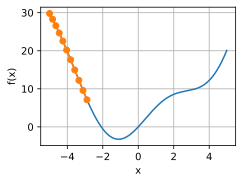

In [38]:
show_trace(gd(0.02, f_grad,-5,10), f)

Ngược lại, nếu chúng ta sử dụng tốc độ học quá lớn, giá trị `|𝜂 𝑓'(𝑥)|` có thể trở nên quá lớn đối với công thức khai triển Taylor bậc nhất. Nghĩa là, số hạng `O (𝜂² 𝑓'²(𝑥))` trong công thức (2) có thể trở nên đáng kể. Trong trường hợp này, chúng ta không thể đảm bảo rằng quá trình cập nhật lặp của `𝑥` sẽ làm giảm giá trị của hàm `𝑓(𝑥)`. Ví dụ, khi chúng ta đặt tốc độ học `𝜂 = 1.1`, `𝑥` vượt quá (overshoots) nghiệm tối ưu `𝑥 = 0` và dần dần phân kỳ.

epoch 11, x: 9.465996


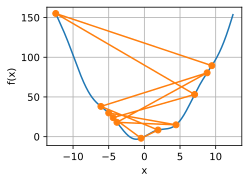

In [39]:
show_trace(gd(1.1, f_grad,-5,10), f)

### Local Minima
Để minh họa điều gì xảy ra với các hàm không lồi, hãy xem xét trường hợp $f(x) = 0.25x^4 - \frac{1}{3}x^3 - 1.5x^2 + 2x$ . Hàm này có  cực tiểu cục bộ tại $x = 2$, với $f(2) \approx -0.67$ và cực tiểu toàn cục nằm tại $x \approx -1.618$, với $f(-1.618) \approx -4.04$. Tùy thuộc vào lựa chọn tốc độ học và mức độ điều kiện của bài toán, ta có thể đạt được một trong nhiều nghiệm. Ví dụ dưới đây minh họa cách một tốc độ học cao sẽ dẫn đến một cực tiểu cục bộ kém. Với tốc độ học 0.08 giá trị của x bắt đầu tại -4 và đi về phía bên phải và vượt qua cực tiểu toàn cục rồi đi tới cực tiểu cục bộ tại $x=2$. 

epoch 11, x: 1.999771


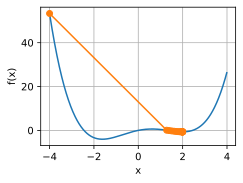

In [40]:
def f(x):  # Objective function
    return 0.25*x**4 - (1/3)*x**3 - 1.5*x**2 + 2*x

def f_grad(x):  # Gradient of the objective function
    return x**3 -x**2-3*x+2

show_trace(gd(0.08, f_grad,-4,20), f)

## Multivariate Gradient Descent
Bây giờ khi đã có trực giác tốt hơn về trường hợp một biến, hãy xem xét tình huống mà $\mathbf{x}=\left[x_1, x_2, \ldots, x_d\right]^{\top}$. Tức là, hàm mục tiêu $f: \mathbb{R}^d \rightarrow \mathbb{R}$ ánh xạ các vector thành số thực. Gradient của nó cũng là đa biến, là một vector gồm $d$ đạo hàm riêng:
$$\nabla f(\mathbf{x})=\left[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\right]^{\top}. \tag{5}$$
Mỗi phần tử đạo hàm riêng $\partial f(\mathbf{x}) / \partial x_i$ trong gradient biểu thị tốc độ thay đổi của $f$ tại $\mathbf{x}$ theo đầu vào $x_i$. Như trong trường hợp một biến, ta có thể sử dụng xấp xỉ Taylor đa biến để có ý tưởng về việc nên làm gì. Cụ thể, ta có:
$$f(\mathbf{x}+\boldsymbol{\epsilon})=f(\mathbf{x})+\boldsymbol{\epsilon}^{\top} \nabla f(\mathbf{x})+O\left(|\boldsymbol{\epsilon}|^2\right). \tag{6}$$
Nói cách khác, đến các hạng bậc hai trong $\epsilon$, hướng giảm nhanh nhất được cho bởi gradient âm $-\nabla f(\mathbf{x})$. Chọn một tốc độ học phù hợp $\eta>0$ cho ra thuật toán hạ gradient nguyên mẫu:
$$\mathbf{x} \leftarrow \mathbf{x}-\eta \nabla f(\mathbf{x}). \tag{7}$$
Để thấy thuật toán hoạt động thế nào trong thực tế, hãy xây dựng một hàm mục tiêu $f(\mathbf{x})=x_1^2+2x_2^2$ với vector hai chiều $\mathbf{x}=\left[x_1, x_2\right]^{\top}$ làm đầu vào và một số thực làm đầu ra. Gradient được cho bởi $\nabla f(\mathbf{x})=\left[2x_1, 4x_2\right]^{\top}$. Ta sẽ quan sát quỹ đạo của $\mathbf{x}$ bằng hạ gradient từ vị trí ban đầu $[-5, -2]$.
Để bắt đầu, ta cần hai hàm hỗ trợ. Hàm đầu tiên sử dụng một hàm cập nhật và áp dụng nó 20 lần cho giá trị ban đầu. Hàm hỗ trợ thứ hai trực quan hóa quỹ đạo của $\mathbf{x}$.

In [41]:
def train_2d(trainer, steps=20, f_grad=None):  # save
    """Optimize a 2D objective function with a customized trainer."""
    # s1 and s2 are internal state variables that will be used in Momentum,
    # Adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  # save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-10, 1.0, 0.1),
                            torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

Tiếp theo, ta quan sát quỹ đạo của biến tối ưu $\mathbf{x}$ với tốc độ học $\eta=0.1$. Ta thấy rằng sau 20 bước, giá trị của $\mathbf{x}$ tiến gần đến cực tiểu tại $[0, 0]$. Tiến trình khá ổn định mặc dù khá chậm.

epoch 20, x1: -2.210012, x2: -0.000073


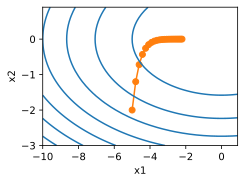

In [42]:
def f_2d(x1, x2): # Objective function
    return x1 ** 2 + 10 * x2 ** 2
def f_2d_grad(x1, x2): # Gradient of the objective function
    return (2 * x1, 20 * x2)
def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)
eta = 0.02
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

## Adaptive Methods
Như đã thấy trong trước, việc chọn tốc độ học $\eta$ "vừa đúng" là một việc khó khăn. Nếu chọn quá nhỏ, tiến bộ rất ít. Nếu chọn quá lớn, nghiệm sẽ dao động và trong trường hợp xấu nhất, có thể phân kỳ. Điều gì sẽ xảy ra nếu  có thể tự động xác định $\eta$ hoặc loại bỏ hoàn toàn việc chọn tốc độ học? Các phương pháp bậc hai, không chỉ xem xét giá trị và gradient của hàm mục tiêu mà còn xem xét độ cong của nó, có thể giúp ích trong trường hợp này. Mặc dù các phương pháp này không thể áp dụng trực tiếp cho học sâu do chi phí tính toán, chúng cung cấp trực giác hữu ích để thiết kế các thuật toán tối ưu hóa nâng cao, mô phỏng nhiều đặc tính mong muốn của các thuật toán được trình bày dưới đây.
### Phương Pháp Newton
Xem lại khai triển Taylor của hàm $f: \mathbb{R}^d \rightarrow \mathbb{R}$, không cần dừng lại sau hạng đầu tiên. Thực tế, ta có thể viết:
$$f(\mathbf{x}+\boldsymbol{\epsilon})=f(\mathbf{x})+\boldsymbol{\epsilon}^{\top} \nabla f(\mathbf{x})+\frac{1}{2} \boldsymbol{\epsilon}^{\top} \nabla^2 f(\mathbf{x}) \boldsymbol{\epsilon}+O\left(|\boldsymbol{\epsilon}|^3\right).\tag{8}$$
Để tránh ký hiệu phức tạp, ta định nghĩa $\mathbf{H} \stackrel{\text{def}}{=} \nabla^2 f(\mathbf{x})$ là ma trận Hessian của $f$, một ma trận $d \times d$. Với $d$ nhỏ và bài toán đơn giản, $\mathbf{H}$ dễ tính toán. Tuy nhiên, với mạng nơ-ron sâu, $\mathbf{H}$ có thể quá lớn để lưu trữ, do chi phí lưu trữ $O\left(d^2\right)$ phần tử. Hơn nữa, việc tính toán qua lan truyền ngược có thể quá tốn kém. Hiện tại, hãy bỏ qua các cân nhắc này và xem xét thuật toán ta sẽ nhận được.
Sau cùng, cực tiểu của $f$ thỏa mãn $\nabla f=0$. Bằng cách lấy đạo hàm của (8) theo $\epsilon$ và bỏ qua các hạng bậc cao:

1. **Số hạng đầu tiên: $ f(x) $**  
   Hàm $ f(x) $ là hằng số đối với $\epsilon$ bởi vì $ x $ là cố định. Cho nên:

   $$
   \nabla_{\epsilon} f(x) = 0
   $$

2. **Số hạng thứ 2: $ \epsilon^T \nabla f(x) $**

    $$ \boldsymbol{\epsilon}^\top \nabla f(\mathbf{x})
    = \epsilon_1 \frac{\partial f(\mathbf{x})}{\partial x_1}
    + \epsilon_2 \frac{\partial f(\mathbf{x})}{\partial x_2}
    + \cdots
    + \epsilon_d \frac{\partial f(\mathbf{x})}{\partial x_d}
    = \sum_{i=1}^{d} \epsilon_i \frac{\partial f(\mathbf{x})}{\partial x_i} $$
    
    Với
    
    $$
    \nabla f(\mathbf{x}) =
    \left[
    \frac{\partial f(\mathbf{x})}{\partial x_1}, \dots, \frac{\partial f(\mathbf{x})}{\partial x_d}
    \right]^\top
    \tag{5}
    $$
    
    là gradient của  $f$ tại $\mathbf{x}$. Suy ra

   $$
   \epsilon^T \nabla f(x) = \sum_{i=1}^d \epsilon_i \frac{\partial f(x)}{\partial x_i}
   $$
    
   Tính toán đạo hàm riêng với $\epsilon_j$:

   $$
   \frac{\partial}{\partial \epsilon_j} \left( \sum_{i=1}^d \epsilon_i \frac{\partial f(x)}{\partial x_i} \right) = \frac{\partial f(x)}{\partial x_j}
   $$

   Gradient là:

   $$
   \nabla_{\epsilon} (\epsilon^T \nabla f(x)) = \nabla f(x) = \begin{bmatrix} \frac{\partial f(x)}{\partial x_1} \\ \vdots \\ \frac{\partial f(x)}{\partial x_d} \end{bmatrix}
   $$

4. **Số hạng thứ 3: $ \frac{1}{2} \epsilon^T \nabla^2 f(x) \epsilon $**  
   $$
   \frac{1}{2} \epsilon^T \nabla^2 f(x) \epsilon = \frac{1}{2} \sum_{i=1}^d \sum_{j=1}^d \epsilon_i \epsilon_j \frac{\partial^2 f(x)}{\partial x_i \partial x_j}
   $$

   Đạo hàm riêng đối với $\epsilon_k$:

   $$
   \frac{\partial}{\partial \epsilon_k} \left( \frac{1}{2} \sum_{i=1}^d \sum_{j=1}^d \epsilon_i \epsilon_j \frac{\partial^2 f(x)}{\partial x_i \partial x_j} \right) = \frac{1}{2} \left( \sum_{j=1}^d \epsilon_j \frac{\partial^2 f(x)}{\partial x_k \partial x_j} + \sum_{i=1}^d \epsilon_i \frac{\partial^2 f(x)}{\partial x_i \partial x_k} \right)
   $$

   Bởi vì $\nabla^2 f(x)$ đối xứng nên hai tổng bằng nhau nên:

   $$
   \frac{\partial}{\partial \epsilon_k} = \sum_{j=1}^d \epsilon_j \frac{\partial^2 f(x)}{\partial x_k \partial x_j} = \left[ \nabla^2 f(x) \epsilon \right]_k
   $$

   Gradient là:

   $$
   \nabla_{\epsilon} \left( \frac{1}{2} \epsilon^T \nabla^2 f(x) \epsilon \right) = \nabla^2 f(x) \epsilon
   $$

5. **Kết hợp với nhau và bỏ qua $ O(\|\epsilon\|^3) $**  
   $$
   \nabla_{\epsilon} f(x + \epsilon) = 0 + \nabla f(x) + \nabla^2 f(x) \epsilon
   $$

Như đã định nghĩa trước đó $\mathbf{H} \stackrel{\text{def}}{=} \nabla^2 f(\mathbf{x})$ nên $\nabla_{\epsilon} f(x + \epsilon) = \nabla f(x) + \mathbf{H} \epsilon$ và ta cần tìm giá trị $\nabla_{\epsilon} f(x + \epsilon)=0$: $$\nabla f(\mathbf{x}) + H \boldsymbol{\epsilon} = 0$$và do đó $$\boldsymbol{\epsilon} = -H^{-1} \nabla f(\mathbf{x})$$ 
Tức là cần nghịch đảo ma trận Hessian $\mathbf{H}$ như một phần của bài toán tối ưu hóa.
Ví dụ với hàm hyperbolic cosine lồi $f(x)=\cosh(cx)$ với một hằng số $c$, cực tiểu toàn cục tại $x=0$ được đạt sau vài lần lặp.

[10.0, 8.000181198120117, 6.001522541046143, 4.0113983154296875, 2.0825424194335938, 0.5257632732391357, 0.011785626411437988, 1.3690441846847534e-07, 0.0, 0.0, 0.0]
epoch 10, x: tensor(0.)


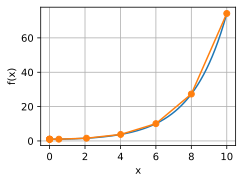

In [55]:
c = torch.tensor(0.5)

def f(x):  # objective function
    return torch.cosh(c * x)

def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c ** 2 * torch.cosh(c * x)

def newton(x,step,eta=1):
    results = [x]
    for i in range(step):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(10.0,10), f)

Xét hàm $f(x)=x \cos(cx)$ với một hằng số $c$. Trong phương pháp Newton, ta chia cho Hessian. Điều này có nghĩa là nếu đạo hàm bậc hai âm, ta có thể đi theo hướng làm tăng giá trị của $f$.

epoch 10, x: tensor(26.8341)


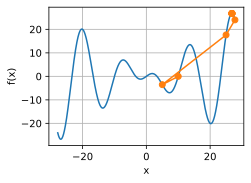

In [44]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return -2 * c * torch.sin(c * x) - c ** 2 * x * torch.cos(c * x)

show_trace(newton(10,10), f)

Hàm số không di chuyển về cực tiểu do đạo hàm bậc 2 âm. Một phương pháp là lấy Hessian bằng cách lấy giá trị tuyệt đối của nó. Một chiến lược khác là đưa lại tốc độ học. Có thông tin bậc hai cho phép thận trọng bất cứ khi nào độ cong lớn và thực hiện các bước dài hơn bất cứ khi nào hàm mục tiêu phẳng hơn. Với tốc độ học nhỏ hơn một chút, chẳng hạn $\eta=0.5$, thuật toán hoạt động hiệu quả hơn.

epoch 10, x: tensor(7.2699)


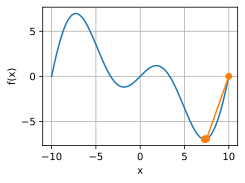

In [45]:
show_trace(newton(10,10,0.5), f)

### Ví dụ minh họa
Lấy thêm một ví dụ minh họa với $f(x) = x \log(x)$. Với phương pháp gradient descent thông thường và phương pháp Newton ta có thể thấy phương pháp Newton tiến về điểm tối ưu nhanh hơn với cùng tốc độ học $\eta=0.2$ và cùng số bước là 10.

[5, 4.659580707550049, 4.267963886260986, 3.810171365737915, 3.265639305114746, 2.608177900314331, 1.815953254699707, 0.9297598600387573, 0.26153862476348877, 0.5321601033210754, 0.2469642162322998]
epoch 10, x: tensor(0.2470)


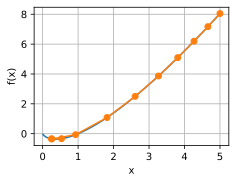

In [75]:
def f(x):
    return x * np.log(x)

def f_grad(x):
    x=torch.tensor([x])
    return (torch.log(x) + 1).item()

def f_grad2(x):
    return 1 / x
show_trace(newton(5,10,0.2), f)


epoch 11, x: 1.014694


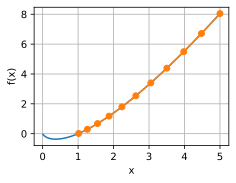

In [76]:
def gd(eta, f_grad, start_x, step):
    x = start_x
    results = [x]
    for i in range(step):
        x -= eta * f_grad(x)
        results.append(x)
    print(f'epoch 11, x: {x:.6f}')
    return results

results = gd(0.2, f_grad,5,10)
show_trace(results, f)

### Phân Tích Hội Tụ
Ta chỉ phân tích tốc độ hội tụ của phương pháp Newton cho một hàm mục tiêu lồi và khả vi ba lần, trong đó đạo hàm bậc hai khác không, tức là $f^{\prime\prime}>0$.
Gọi $x^{(k)}$ là giá trị của $x$ tại lần lặp thứ $k$ và đặt $e^{(k)} \stackrel{\text{def}}{=} x^{(k)}-x^*$ là khoảng cách từ điểm tối ưu tại lần lặp thứ $k$. Bằng khai triển Taylor, ta có điều kiện $f^{\prime}\left(x^{(*)}\right)=0$ có thể được viết là:
$$0=f^{\prime}\left(x^{(k)}-e^{(k)}\right)=f^{\prime}\left(x^{(k)}\right)-e^{(k)} f^{\prime\prime}\left(x^{(k)}\right)+\frac{1}{2}\left(e^{(k)}\right)^2 f^{\prime\prime\prime}\left(\xi^{(k)}\right),$$
điều này đúng với một $\xi^{(k)} \in \left[x^{(k)}-e^{(k)}, x^{(k)}\right]$. Chia khai triển trên cho $f^{\prime\prime}\left(x^{(k)}\right)$, ta được:
$$e^{(k)}-\frac{f^{\prime}\left(x^{(k)}\right)}{f^{\prime\prime}\left(x^{(k)}\right)}=\frac{1}{2}\left(e^{(k)}\right)^2 \frac{f^{\prime\prime\prime}\left(\xi^{(k)}\right)}{f^{\prime\prime}\left(x^{(k)}\right)} .$$
Nhớ rằng ta có cập nhật $x^{(k+1)}=x^{(k)}-f^{\prime}\left(x^{(k)}\right) / f^{\prime\prime}\left(x^{(k)}\right)$. Thay vào phương trình cập nhật này và lấy giá trị tuyệt đối của cả hai vế, ta có:
$$\left|e^{(k+1)}\right|=\frac{1}{2}\left(e^{(k)}\right)^2 \frac{\left|f^{\prime\prime\prime}\left(\xi^{(k)}\right)\right|}{f^{\prime\prime}\left(x^{(k)}\right)} .$$
Do đó, bất cứ khi nào ta ở trong một vùng có $\left|f^{\prime\prime\prime}\left(\xi^{(k)}\right)\right| /\left(2 f^{\prime\prime}\left(x^{(k)}\right)\right) \leq c$, ta có sai số giảm bậc hai:
$$\left|e^{(k+1)}\right| \leq c\left(e^{(k)}\right)^2 .$$
Lưu ý rằng các nhà nghiên cứu tối ưu hóa gọi đây là hội tụ tuyến tính, trong khi một điều kiện như $\left|e^{(k+1)}\right| \leq \alpha\left|e^{(k)}\right|$ được gọi là tốc độ hội tụ hằng số. Phân tích này đi kèm với một số lưu ý. Thứ nhất, không thực sự có đảm bảo khi nào sẽ đạt được vùng hội tụ nhanh. Thay vào đó chỉ biết rằng một khi đạt được, hội tụ sẽ rất nhanh. Thứ hai, phân tích này yêu cầu $f$ có tính chất tốt đến các đạo hàm bậc cao. Nó phụ thuộc vào việc đảm bảo rằng $f$ không có bất kỳ đặc tính "bất ngờ" nào về cách nó có thể thay đổi giá trị.

### Tiền Điều Kiện Hóa
Không ngạc nhiên khi việc tính toán và lưu trữ toàn bộ Hessian rất tốn kém. Do đó, việc tìm các giải pháp thay thế là mong muốn. Một cách để cải thiện là tiền điều kiện hóa. Nó tránh tính toán toàn bộ Hessian mà chỉ tính các phần tử đường chéo. Điều này dẫn đến các thuật toán cập nhật dạng:
$$\mathbf{x} \leftarrow \mathbf{x}-\eta \operatorname{diag}(\mathbf{H})^{-1} \nabla f(\mathbf{x}) .$$
Mặc dù điều này không tốt bằng phương pháp Newton đầy đủ, nó vẫn tốt hơn nhiều so với việc không sử dụng. Để thấy tại sao đây là ý tưởng tốt, hãy xem xét một tình huống mà một biến biểu thị chiều cao tính bằng milimet và một biến khác biểu thị chiều cao tính bằng kilômét. Giả sử rằng với cả hai, tỷ lệ tự nhiên là mét, ta có sự không khớp lớn trong tham số hóa. May mắn thay, việc sử dụng tiền điều kiện hóa sẽ loại bỏ điều này. Hiệu quả, tiền điều kiện hóa với gradient descent tương đương với việc chọn một tốc độ học khác nhau cho mỗi biến (tọa độ của vector $\mathbf{x}$). Như ta sẽ thấy sau, tiền điều kiện hóa thúc đẩy một số cải tiến trong các thuật toán tối ưu hóa gradient descent ngẫu nhiên.
### Gradient descent với Tìm Kiếm Tuyến
Một trong những vấn đề chính trong hạ gradient là ta có thể vượt quá mục tiêu hoặc tiến bộ không đủ. Một cách sửa đơn giản là sử dụng tìm kiếm tuyến kết hợp với gradient descent. Tức là, ta sử dụng hướng được cho bởi $\nabla f(\mathbf{x})$ và sau đó thực hiện tìm kiếm nhị phân để xác định tốc độ học $\eta$ nào tối ưu hóa $f(\mathbf{x}-\eta \nabla f(\mathbf{x}))$.
Thuật toán này hội tụ nhanh chóng. Tuy nhiên, đối với mục đích học sâu, điều này không thực sự khả thi, vì mỗi bước của tìm kiếm tuyến sẽ yêu cầu đánh giá hàm mục tiêu trên toàn bộ tập dữ liệu. Điều này quá tốn kém để thực hiện.

## Excercises